## Data Cleaning

In [2]:
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
df = pd.read_csv('datasets/Retail_Store.csv' , encoding='latin-1')
df.head()

(180519, 53)


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [14]:
# Finding number of columns and rows
print("The Original Dataset contains", df.shape[1],"Columns and",df.shape[0],"Rows.")

The Original Dataset contains 53 Columns and 180519 Rows.


Checking for missing values in the columns

In [9]:
def col_missing_values(df):
    for i in df.columns:
        if df[i].isna().sum()>0:
            print("Column",i,"is missing",str(df[i].isna().sum()),"values.")

col_missing_values(df)

Column Customer Lname is missing 8 values.
Column Customer Zipcode is missing 3 values.
Column Order Zipcode is missing 155679 values.
Column Product Description is missing 180519 values.


Checking for duplicate Rows and Columns

In [22]:
duplicate_rows_df = df[df.duplicated()]

print("Number of duplicate rows: ", duplicate_rows_df.shape[0])

Number of duplicate rows:  0


In [21]:
# Check for columns with identical values
duplicated_columns = df.T.duplicated()

# Display names of duplicated columns
duplicate_columns = df.columns[duplicated_columns].tolist()
print("Duplicate columns (with different names):", duplicate_columns)

Duplicate columns (with different names): ['Customer Password', 'Order Customer Id', 'Order Item Total', 'Order Profit Per Order', 'Product Card Id', 'Product Category Id', 'Product Price']


From the codes above, we have decided to drop:
* Instead of imputing in values, we drop the columns with missing data as they do contain very valuable information 
* Duplicate Columns 
* Other columns we deem carry insignificant information

In [23]:
df = df.drop(columns=['Customer Lname','Customer Zipcode','Order Zipcode','Product Description',
                      'Customer Password','Order Customer Id','Order Item Total','Order Profit Per Order',
                      'Product Card Id','Product Category Id','Product Price','Customer Fname',
                      'Product Description','Customer Email','Product Image','Product Status',
                      'Order Id','Order Item Id','Order Item Cardprod Id'])

In [25]:
# Dropped 18 Columns
df.shape

(180519, 35)

### Converting and Filtering of Data

Next, we use Pandas to convert the DateOrders column to Datetime format.
* Creates 3 more columns

In [27]:
df['order_date'] = pd.to_datetime(df['order date (DateOrders)'])
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month

print(df[['order_date', 'year', 'month']].head())

           order_date  year  month
0 2018-01-31 22:56:00  2018      1
1 2018-01-13 12:27:00  2018      1
2 2018-01-13 12:06:00  2018      1
3 2018-01-13 11:45:00  2018      1
4 2018-01-13 11:24:00  2018      1


In [30]:
# To see what Order Status and Years are available.
print(df['Order Status'].unique())
print(df['year'].unique())
print(df['order_date'])

['COMPLETE' 'PENDING' 'CLOSED' 'PENDING_PAYMENT' 'CANCELED' 'PROCESSING'
 'SUSPECTED_FRAUD' 'ON_HOLD' 'PAYMENT_REVIEW']
[2018 2016 2015 2017]
0        2018-01-31 22:56:00
1        2018-01-13 12:27:00
2        2018-01-13 12:06:00
3        2018-01-13 11:45:00
4        2018-01-13 11:24:00
                 ...        
180514   2016-01-16 03:40:00
180515   2016-01-16 01:34:00
180516   2016-01-15 21:00:00
180517   2016-01-15 20:18:00
180518   2016-01-15 18:54:00
Name: order_date, Length: 180519, dtype: datetime64[ns]


In [33]:
# Exclude rows where the year is 2018
df_filtered = df[df['order_date'].dt.year != 2018]

In [35]:
# Further filter to include only 'CLOSED' and 'COMPLETED' in 'Order Status'
df_filtered = df_filtered[df_filtered['Order Status'].isin(['CLOSED', 'COMPLETED'])]

In [41]:
# Original Dataset contains 53 Columns and 180519 Rows.
# Replacing the original df with the filtered version df_filtered
df = df_filtered
df.shape

(19369, 38)

In [ ]:
# Create a csv with cleaned data
df.to_csv('Retail_Store_Cleaned.csv', index=False)

Using a heatmap to get an visualise the relationships between 2 different features after cleaning and filtering the data

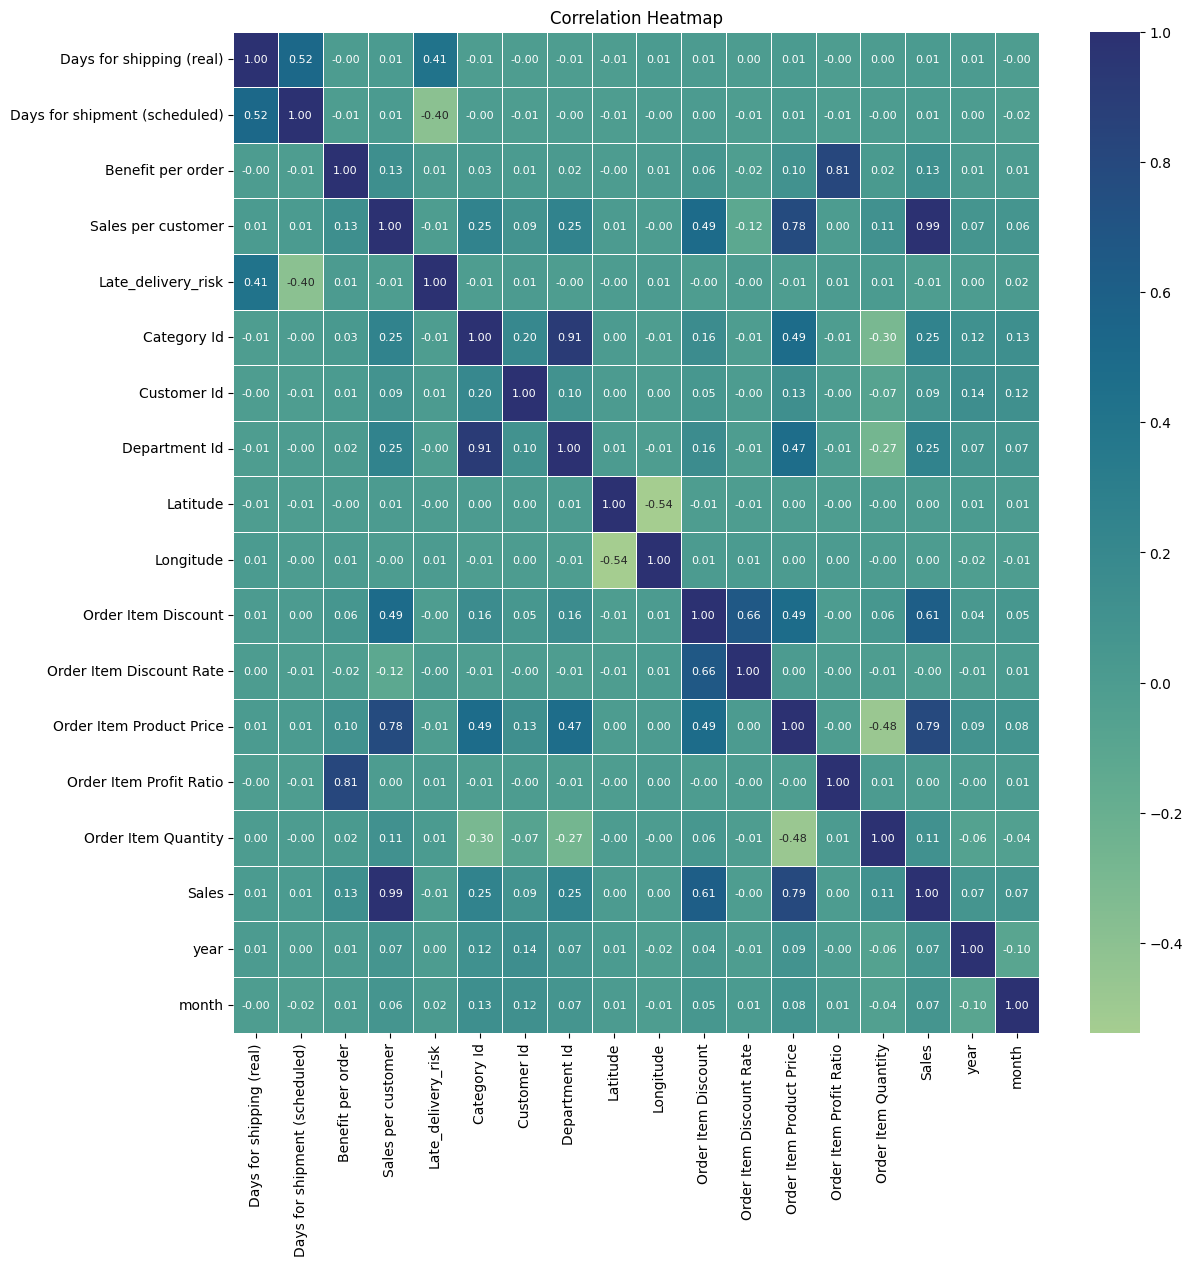

In [37]:
# Numeric_only=True, as .corr() can only take float or int 
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(13, 13))  
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt='.2f', linewidths=0.5,annot_kws={"size": 8})
plt.title('Correlation Heatmap')
plt.show()

### Insights from Heatmap:

* idk hehe